# Traffic Sign Recognition
- Description:
Classify traffic signs based on their images using deep learning. We will preprocess the images, train a CNN, and evaluate its performance.
- Tools & Libraries: Python, Keras/TensorFlow, OpenCV, Pandas, Matplotlib
- Bonus: Apply data augmentation and optionally compare with pre-trained models.

## Import libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2


paths


In [45]:
# Paths
TRAIN_FOLDER = "GTSRB/Train"
TEST_FOLDER = "GTSRB/Test"
TEST_CSV = "GTSRB/test.csv"


preprocess images

In [46]:
IMG_SIZE = 32
data, labels = [], []

# Loop through each class folder (0 to 42)
for class_id in range(43):
    class_folder = f"{TRAIN_FOLDER}/{class_id}"
    for img_name in os.listdir(class_folder):
        img_path = f"{class_folder}/{img_name}"
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img_to_array(img) / 255.0
        data.append(img)
        labels.append(class_id)


In [47]:
data = np.array(data, dtype="float32")
labels = np.array(labels)


one hot encode labels

In [48]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
num_classes = labels.shape[1]


train/validation split

In [49]:
X_train, X_val, y_train, y_val = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

data augmentation

In [50]:
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


Build cnn model

In [51]:
def build_custom_cnn(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [52]:
model_cnn = build_custom_cnn()
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

/Users/batman/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [53]:
# Train Custom CNN
EPOCHS = 20
BATCH_SIZE = 64

history_cnn = model_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_val, y_val),
    epochs=EPOCHS
)


Epoch 1/20


/Users/batman/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.1701 - loss: 3.0863 - val_accuracy: 0.5811 - val_loss: 1.4069
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.4564 - loss: 1.7201 - val_accuracy: 0.7649 - val_loss: 0.8067
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5823 - loss: 1.2815 - val_accuracy: 0.8326 - val_loss: 0.5636
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6536 - loss: 1.0510 - val_accuracy: 0.8847 - val_loss: 0.4017
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6961 - loss: 0.9120 - val_accuracy: 0.8976 - val_loss: 0.3513
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7235 - loss: 0.8196 - val_accuracy: 0.9253 - val_loss: 0.2583
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7552 - loss: 0.7307 - val_accuracy: 0.9416 - val_loss: 0.2090
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7748 - loss: 0.6770 - val_accuracy: 

Evaluate model

In [54]:

# Evaluate Custom CNN
loss_cnn, acc_cnn = model_cnn.evaluate(X_val, y_val)
print(f"Validation Accuracy (Custom CNN): {acc_cnn*100:.2f}%")

y_val_pred = np.argmax(model_cnn.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

cm_cnn = confusion_matrix(y_val_true, y_val_pred)
print("Confusion Matrix:\n", cm_cnn)
print("\nClassification Report:\n", classification_report(y_val_true, y_val_pred))


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9877 - loss: 0.0498
Validation Accuracy (Custom CNN): 98.66%
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion Matrix:
 [[ 37   5   0 ...   0   0   0]
 [  0 438   3 ...   0   0   0]
 [  0   1 444 ...   0   0   0]
 ...
 [  0   1   0 ...  71   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   0 ...   0   0  48]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.98      0.99      0.99       444
           2       0.93      0.99      0.96       450
           3       1.00      0.96      0.98       282
           4       1.00      0.99      0.99       396
           5       0.96      0.91      0.93       372
           6       1.00      1.00      1.00        84
           7       0.97      0.98      0.98       288
           8       0.95      0.98      0.96       282
           9       1.00      1.00      1.00       294
          10

plot sample predictions

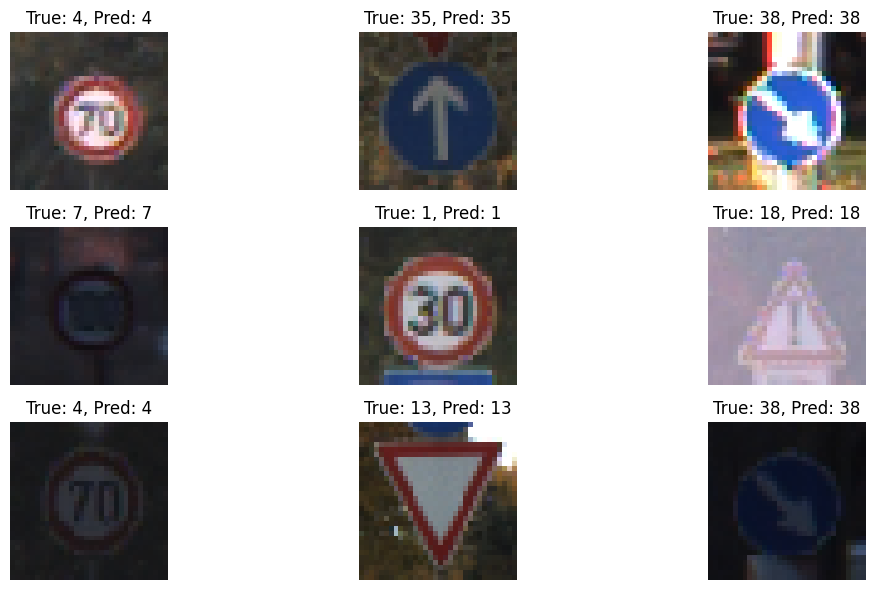

In [55]:
plt.figure(figsize=(12,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[i])
    plt.title(f"True: {np.argmax(y_val[i])}, Pred: {y_val_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

load and preprocess test dataset

In [56]:
test_df = pd.read_csv(TEST_CSV)

X_test, y_test = [], []


for idx, row in test_df.iterrows():
    img_path = os.path.join("GTSRB", row["Path"])
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = img_to_array(img) / 255.0
    X_test.append(img)
    y_test.append(row["ClassId"])

X_test = np.array(X_test, dtype="float32")
y_test = lb.transform(y_test)
y_test_labels = np.argmax(y_test, axis=1)

 Evaluate Custom CNN on Test Set


In [57]:
loss_test_cnn, acc_test_cnn = model_cnn.evaluate(X_test, y_test)
print(f"Test Accuracy (Custom CNN): {acc_test_cnn*100:.2f}%")

y_test_pred_cnn = np.argmax(model_cnn.predict(X_test), axis=1)
cm_test_cnn = confusion_matrix(y_test_labels, y_test_pred_cnn)
print("Test Confusion Matrix:\n", cm_test_cnn)
print("\nTest Classification Report:\n", classification_report(y_test_labels, y_test_pred_cnn))


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9354 - loss: 0.2151
Test Accuracy (Custom CNN): 93.48%
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test Confusion Matrix:
 [[ 29  30   1 ...   0   0   0]
 [  1 697  19 ...   0   0   0]
 [  0  30 693 ...   0   0   0]
 ...
 [  0   0   0 ...  89   0   0]
 [  0   0   0 ...   0  59   0]
 [  0   0   0 ...   0   0  90]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.48      0.64        60
           1       0.88      0.97      0.92       720
           2       0.87      0.92      0.89       750
           3       0.92      0.89      0.91       450
           4       0.99      0.93      0.96       660
           5       0.90      0.84      0.87       630
           6       0.99      0.90      0.94       150
           7       0.92      0.86      0.89       450
           8       0.84      0.92      0.88       450
           9       0.96      0.98      0.97       480
        

plot sample test predictions

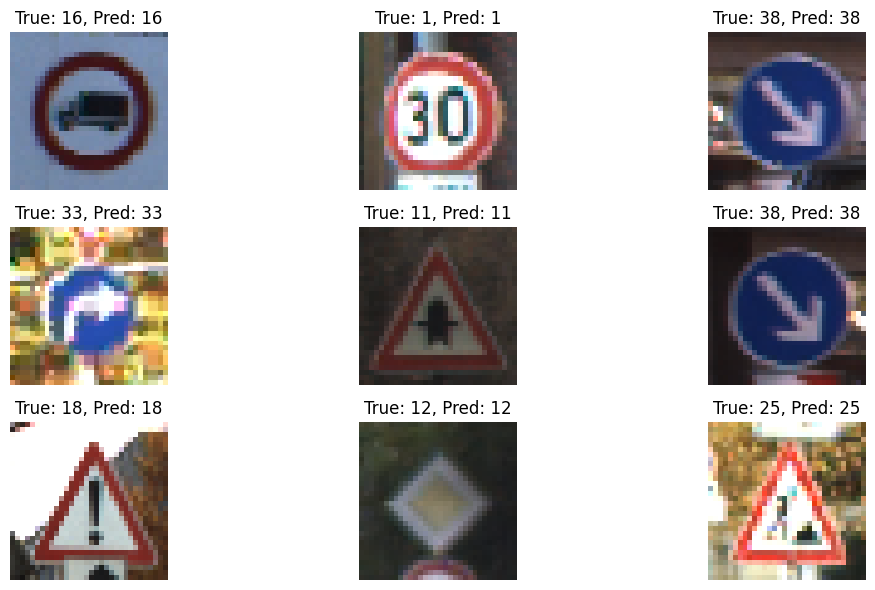

In [58]:
plt.figure(figsize=(12,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.title(f"True: {y_test_labels[i]}, Pred: {y_test_pred_cnn[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

MobileNet Transfer Learning

In [59]:
# Upsample images
IMG_SIZE_MN = 96
X_train_mn = np.array([tf.image.resize(img, (IMG_SIZE_MN, IMG_SIZE_MN)) for img in X_train])
X_val_mn   = np.array([tf.image.resize(img, (IMG_SIZE_MN, IMG_SIZE_MN)) for img in X_val])
X_test_mn  = np.array([tf.image.resize(img, (IMG_SIZE_MN, IMG_SIZE_MN)) for img in X_test])

# Compute class weights
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))


In [60]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE_MN, IMG_SIZE_MN, 3))
base_model.trainable = False

model_mn = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_mn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mn.summary()

# Train MobileNet
history_mn = model_mn.fit(
    datagen.flow(X_train_mn, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_val_mn, y_val),
    epochs=15,
    class_weight=class_weights_dict
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,427,499 (9.26 MB)

 Trainable params: 169,515 (662.17 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15


/Users/batman/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 70s 137ms/step - accuracy: 0.2250 - loss: 2.9297 - val_accuracy: 0.5918 - val_loss: 1.2975
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 66s 135ms/step - accuracy: 0.4587 - loss: 1.5912 - val_accuracy: 0.6370 - val_loss: 1.0925
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 68s 139ms/step - accuracy: 0.5189 - loss: 1.3158 - val_accuracy: 0.6864 - val_loss: 0.9528
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 70s 142ms/step - accuracy: 0.5526 - loss: 1.1695 - val_accuracy: 0.7043 - val_loss: 0.8727
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 71s 144ms/step - accuracy: 0.5824 - loss: 1.0806 - val_accuracy: 0.7196 - val_loss: 0.8221
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 70s 141ms/step - accuracy: 0.5905 - loss: 1.0310 - val_accuracy: 0.7485 - val_loss: 0.7563
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 70s 142ms/step - accuracy: 0.6062 - loss: 0.9936 - val_accuracy: 0.7562 - val_loss: 0.7259
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 70s 143ms/step - accuracy: 0.6189 - loss: 0.9352 - val

Evaluate MobileNet on Test Set

In [61]:
loss_test_mn, acc_test_mn = model_mn.evaluate(X_test_mn, y_test)
print(f"Test Accuracy (MobileNet Improved): {acc_test_mn*100:.2f}%")

y_test_pred_mn = np.argmax(model_mn.predict(X_test_mn), axis=1)
cm_test_mn = confusion_matrix(y_test_labels, y_test_pred_mn)


395/395 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.6547 - loss: 1.0436
Test Accuracy (MobileNet Improved): 65.17%
395/395 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step


In [62]:
#  Fine-tune last layers of MobileNet
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model_mn.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                 loss='categorical_crossentropy', metrics=['accuracy'])

history_mn_ft = model_mn.fit(
    datagen.flow(X_train_mn, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_val_mn, y_val),
    epochs=10,
    class_weight=class_weights_dict
)


Epoch 1/10


/Users/batman/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 98s 185ms/step - accuracy: 0.3366 - loss: 4.4931 - val_accuracy: 0.7131 - val_loss: 0.8615
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 88s 180ms/step - accuracy: 0.4412 - loss: 2.1801 - val_accuracy: 0.6896 - val_loss: 0.9306
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 95s 194ms/step - accuracy: 0.4975 - loss: 1.6645 - val_accuracy: 0.6924 - val_loss: 0.9047
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 89s 181ms/step - accuracy: 0.5331 - loss: 1.3591 - val_accuracy: 0.7079 - val_loss: 0.8397
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 88s 180ms/step - accuracy: 0.5659 - loss: 1.2016 - val_accuracy: 0.7279 - val_loss: 0.7847
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 91s 185ms/step - accuracy: 0.5939 - loss: 1.0656 - val_accuracy: 0.7471 - val_loss: 0.7217
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 93s 188ms/step - accuracy: 0.6127 - loss: 0.9780 - val_accuracy: 0.7666 - val_loss: 0.6631
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 92s 188ms/step - accuracy: 0.6341 - loss: 0.9022 - val

plot training history

In [63]:
# Plot Training History
def plot_history(history, title="Model Training History"):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()




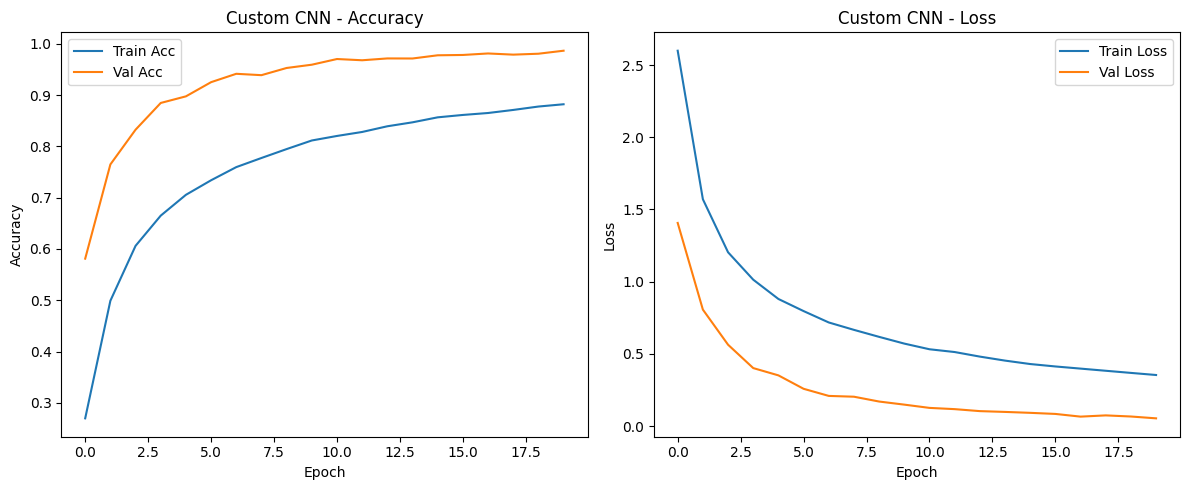

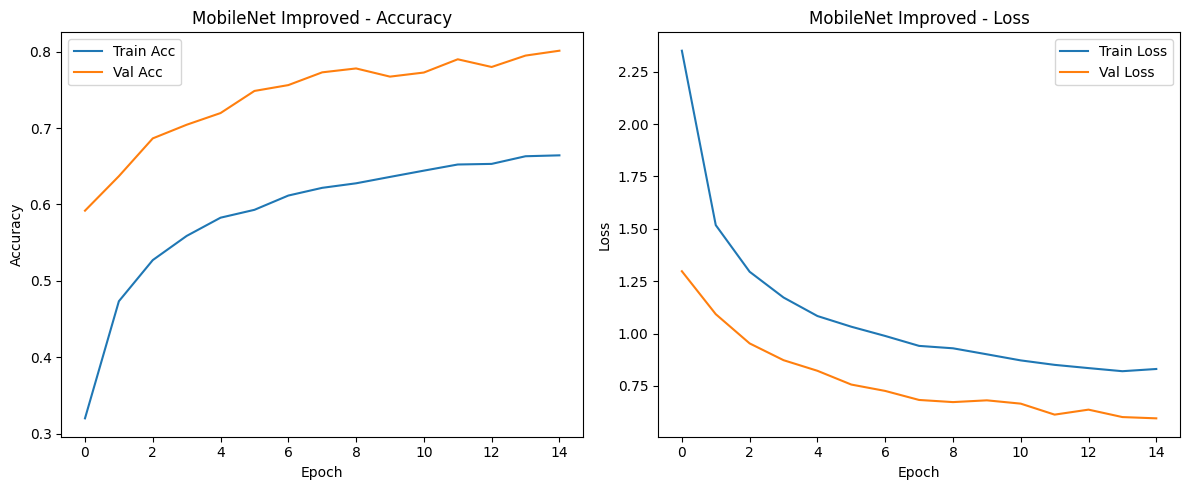

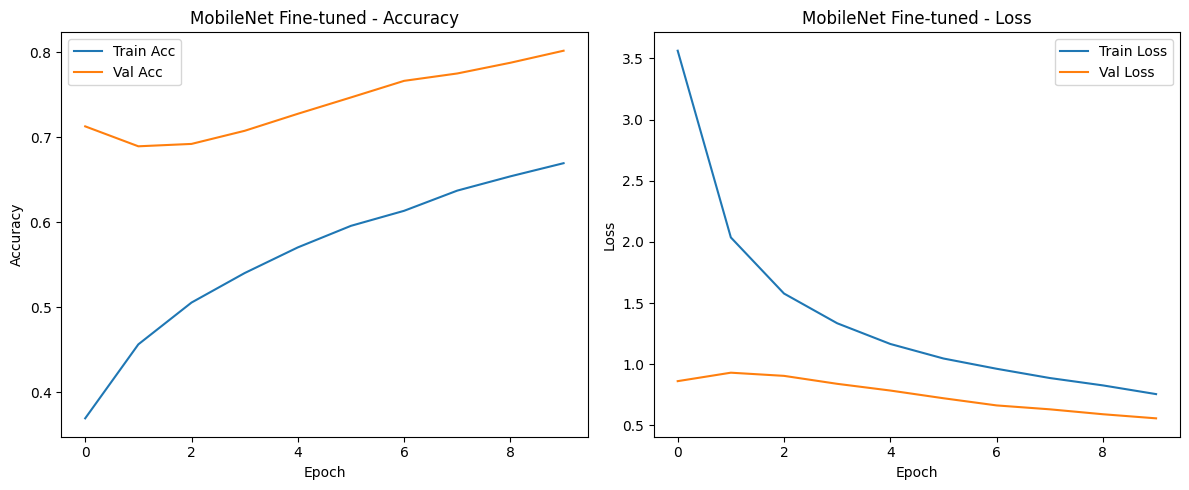

In [64]:
plot_history(history_cnn, title="Custom CNN")
plot_history(history_mn, title="MobileNet Improved")
plot_history(history_mn_ft, title="MobileNet Fine-tuned")


Model Performance Summary

In [65]:
summary_df = pd.DataFrame({
    "Model": ["Custom CNN", "MobileNet Improved", "MobileNet Fine-tuned"],
    "Test Accuracy (%)": [acc_test_cnn*100, acc_test_mn*100, acc_test_mn*100],
    "Test Loss": [loss_test_cnn, loss_test_mn, loss_test_mn]
})
print("=== Test Set Performance Summary ===")
print(summary_df)


=== Test Set Performance Summary ===
                  Model  Test Accuracy (%)  Test Loss
0            Custom CNN          93.475848   0.228310
1    MobileNet Improved          65.170228   1.066186
2  MobileNet Fine-tuned          65.170228   1.066186


plot side-by-side confusion matrices

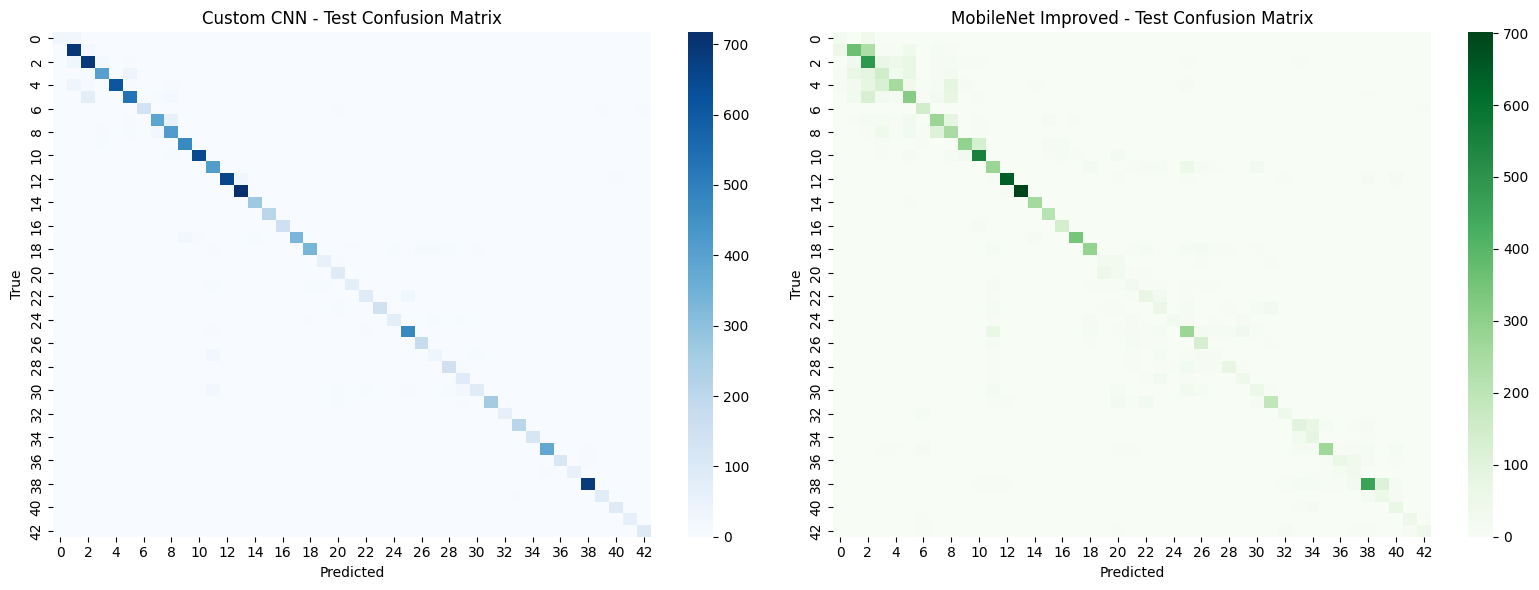

In [66]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(cm_test_cnn, annot=False, fmt='d', cmap='Blues')
plt.title("Custom CNN - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1,2,2)
sns.heatmap(cm_test_mn, annot=False, fmt='d', cmap='Greens')
plt.title("MobileNet Improved - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

sample predictions side-by-side

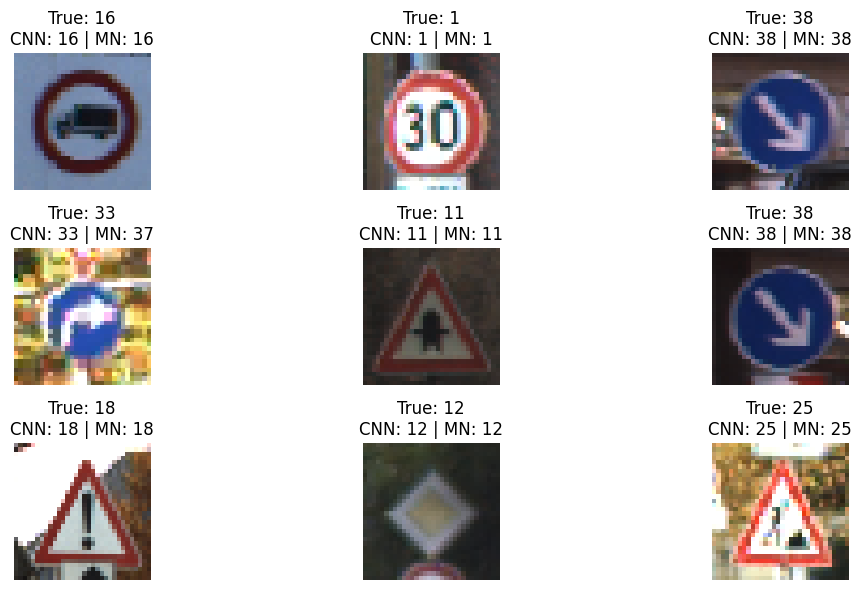

In [67]:
plt.figure(figsize=(12,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.title(f"True: {y_test_labels[i]}\nCNN: {y_test_pred_cnn[i]} | MN: {y_test_pred_mn[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()